<a href="https://colab.research.google.com/github/wales101/don/blob/master/Deep_learning(kaggle__project_dog_vs_cat).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.image import imread

%matplotlib inline

In [ ]:
data_dir = 'C:\\Users\\issax\\desktop\\my_fold\\'

In [ ]:
test_path = data_dir+'test\\test_set\\'
train_path = data_dir+'train\\training_set\\'

In [ ]:
os.listdir(test_path)


['cats', 'dogs']

In [ ]:
single_img = test_path+'dogs\\'+'dog.4001.jpg'

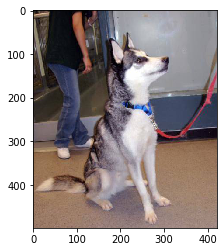

In [ ]:
plt.imshow(imread(single_img))
plt.show()

In [ ]:
dim1 = []

dim2 = []

for image_filename in os.listdir(test_path+'dogs'):
    
    img = imread(test_path+'dogs\\'+image_filename)
    
    d1,d2,colors = img.shape
    
    dim1.append(d1)
    dim2.append(d2)

In [ ]:
img_size = (150, 150, 3)

In [ ]:
import seaborn as sns

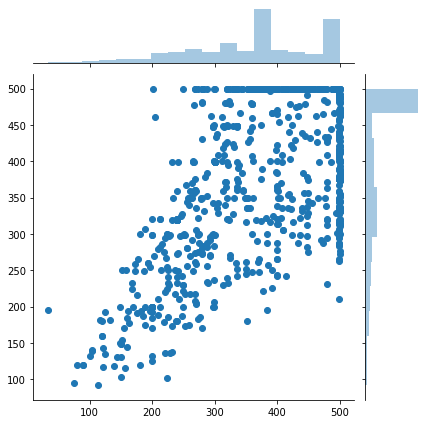

In [ ]:
sns.jointplot(dim1, dim2)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [ ]:
img_gen = ImageDataGenerator( rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1, zoom_range=0.1, rescale=1./255, shear_range=0.1, horizontal_flip=True )


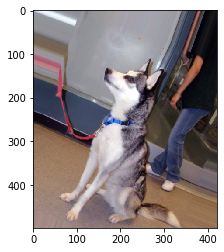

In [ ]:
plt.imshow(img_gen.random_transform(imread(single_img)))

In [ ]:
img_gen.random_transform(imread(single_img)).max()

255

In [ ]:
train_gen = img_gen.flow_from_directory(train_path, target_size=(300, 300), class_mode='binary')


Found 8000 images belonging to 2 classes.


In [ ]:
test_gen = img_gen.flow_from_directory(test_path, target_size=(300, 300), class_mode='binary', shuffle=False )

Found 2022 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early = EarlyStopping(monitor='val_loss', patience=2)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:


train_gen = img_gen.flow_from_directory(train_path, target_size=(150, 150), class_mode='binary')

test_gen = img_gen.flow_from_directory(test_path, target_size=(150, 150), class_mode='binary', shuffle=False )




Found 8000 images belonging to 2 classes.
Found 2022 images belonging to 2 classes.


In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape = img_size, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape = img_size, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape = img_size, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape = img_size, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



In [ ]:
model.fit_generator(train_gen, epochs=20, validation_data = test_gen, callbacks=[early])

Epoch 1/20
250/250 [==============================] - 304s 1s/step - loss: 0.4287 - accuracy: 0.8010 - val_loss: 0.4205 - val_accuracy: 0.8200
Epoch 2/20
250/250 [==============================] - 303s 1s/step - loss: 0.4077 - accuracy: 0.8155 - val_loss: 0.4267 - val_accuracy: 0.8116
Epoch 3/20
250/250 [==============================] - 303s 1s/step - loss: 0.3939 - accuracy: 0.8210 - val_loss: 0.3947 - val_accuracy: 0.8328
Epoch 4/20
250/250 [==============================] - 303s 1s/step - loss: 0.3790 - accuracy: 0.8329 - val_loss: 0.3958 - val_accuracy: 0.8259
Epoch 5/20
250/250 [==============================] - 306s 1s/step - loss: 0.3622 - accuracy: 0.8364 - val_loss: 0.3790 - val_accuracy: 0.8388
Epoch 6/20
250/250 [==============================] - 303s 1s/step - loss: 0.3562 - accuracy: 0.8416 - val_loss: 0.3520 - val_accuracy: 0.8551
Epoch 7/20
250/250 [==============================] - 304s 1s/step - loss: 0.3387 - accuracy: 0.8520 - val_loss: 0.3841 - val_accuracy: 0.8521

In [ ]:
final_loss = pd.DataFrame(model.history.history)



In [ ]:
final_loss.head()

,loss,accuracy,val_loss,val_accuracy
0,0.428657,0.801000,0.420479,0.819980
1,0.407727,0.815500,0.426713,0.811573
2,0.393865,0.821000,0.394672,0.832839
3,0.379026,0.832875,0.395846,0.825915
4,0.362242,0.836375,0.378993,0.838773


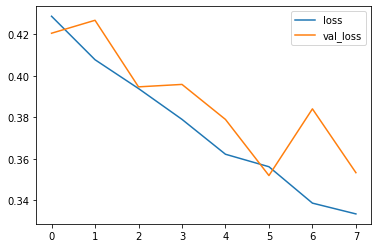

In [ ]:
final_loss[['loss', 'val_loss']].plot()
plt.show()

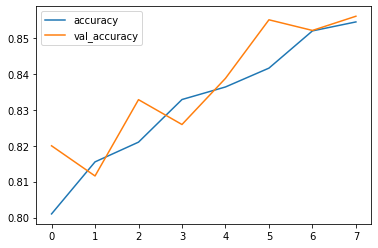

In [ ]:
final_loss[['accuracy', 'val_accuracy']].plot()
plt.show()

In [ ]:
predx = model.predict_generator(test_gen)

In [ ]:
predx

array([[0.52903265],
       [0.72218597],
       [0.06415135],
       ...,
       [0.14745787],
       [0.34154162],
       [0.992492  ]], dtype=float32)

In [ ]:
predy = predx > 0.5

In [ ]:
print(classification_report(test_gen.classes, predy))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1011
           1       0.85      0.85      0.85      1011

    accuracy                           0.85      2022
   macro avg       0.85      0.85      0.85      2022
weighted avg       0.85      0.85      0.85      2022



In [ ]:
#image to test with

os.listdir(test_path+'dogs')[5:12]

['dog.4006.jpg',
 'dog.4007.jpg',
 'dog.4008.jpg',
 'dog.4009.jpg',
 'dog.4010.jpg',
 'dog.4011.jpg',
 'dog.4012.jpg']

In [ ]:
img_to_test = test_path+'dogs\\'+'dog.4010.jpg'

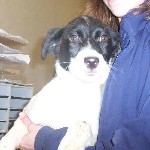

In [ ]:
img_test = image.load_img(img_to_test, target_size=(150, 150))

img_test

In [ ]:
img_array = image.img_to_array(img_test) 

In [ ]:
img_array = img_array/255

In [ ]:
img_array_test = img_array.reshape(1, 150, 150, 3)

In [ ]:
model.predict(img_array_test)

array([[0.6688426]], dtype=float32)

In [ ]:
test_gen.class_indices

{'cats': 0, 'dogs': 1}